In [1]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D , MaxPooling2D, UpSampling2D, Conv2DTranspose, BatchNormalization, Activation, Add
from tensorflow.keras.layers import ZeroPadding2D, Input, AveragePooling2D, Flatten, Dense, Dropout, concatenate
from matplotlib import pyplot as plt

##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
SAVE_MODEL = "classification-vgg16-1"
    
#https://towardsdatascience.com/galaxy-zoo-classification-with-keras-219184aff581    
    
import DatasetUtilsTifF as dsutils

In [2]:
img_width=64; img_height=64
IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/"
TRAIN_CLASSES_PATH = "C:/Projects/VenusDenoise/out_tests/0100_1000-64-train7.csv"
VALID_CLASSES_PATH = "C:/Projects/VenusDenoise/out_tests/train_classes/0100_1000-64-7.csv"

batch_size=16
class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

In [3]:
train_files, train_classes, train_images = \
        dsutils.readDatasetClassification(IMG_PATH, img_width, img_height, radiance_limits, TRAIN_CLASSES_PATH)

val_files, val_classes, val_images = \
    dsutils.readDatasetClassification(IMG_PATH + "validation/", img_width, img_height, radiance_limits, VALID_CLASSES_PATH)

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/
Noisy files:8738
Nitid files:8738
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/validation/
Noisy files:2208
Nitid files:2208


In [4]:
train_images = np.reshape(train_images, (len(train_images), img_height, img_width, 1))  
val_images= np.reshape(val_images, (len(val_images), img_height, img_width, 1))  

#train_classes = train_classes.squeeze()
#valid_classes = valid_classes.squeeze()

train_classes= np.reshape(train_classes, (len(train_classes), 1))  
val_classes= np.reshape(val_classes, (len(val_classes), 1))  

In [5]:
train_classes = tf.keras.utils.to_categorical( train_classes, num_classes=None, dtype='float32')
val_classes = tf.keras.utils.to_categorical( val_classes, num_classes=None, dtype='float32')

In [6]:
input_layer = Input((img_width, img_height,1))

conv1 = Conv2D(64, (3,3), activation='relu', padding='same')(input_layer)
conv1 = Conv2D(64, (3,3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2,2))(conv1)

conv2 = Conv2D(128, (3,3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(128, (3,3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D((2,2))(conv2)

conv3 = Conv2D(256, (3,3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(256, (3,3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D((2,2))(conv3)

conv4 = Conv2D(512, (3,3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(512, (3,3), activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D((2,2))(conv4)

conv5 = Conv2D(512, (3,3), activation='relu', padding='same')(pool4)
conv5 = Conv2D(512, (3,3), activation='relu', padding='same')(conv5)
pool5 = MaxPooling2D((2,2))(conv5)

dense1 = Dense(4096, activation='relu')(pool5)
dense1 = Dropout(0.5)(dense1)
#dense2 = Dense(4096, activation='relu')(dense1)
#dense2 = Dropout(0.5)(dense2)

flatten = Flatten()(dense1)

output_layer = Dense(4, activation = 'sigmoid')(flatten)

model = Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0     

In [7]:
from tensorflow.keras.optimizers import Nadam
model.compile(optimizer=Nadam(learning_rate=0.00001), loss='categorical_crossentropy', metrics =['accuracy'])

In [8]:
hist = model.fit(train_images, train_classes, 
                        epochs=200,
                        batch_size=16, 
                        verbose=1, 
                        validation_data=(val_images, val_classes))


Epoch 1/200
547/547 [==============================] - 23s 27ms/step - loss: 1.0852 - accuracy: 0.5594 - val_loss: 1.5128 - val_accuracy: 0.2812
Epoch 2/200
547/547 [==============================] - 14s 26ms/step - loss: 0.9643 - accuracy: 0.5993 - val_loss: 1.6353 - val_accuracy: 0.3601
Epoch 3/200
547/547 [==============================] - 14s 26ms/step - loss: 0.9271 - accuracy: 0.6271 - val_loss: 1.6036 - val_accuracy: 0.3478
Epoch 4/200
547/547 [==============================] - 14s 26ms/step - loss: 0.9215 - accuracy: 0.6297 - val_loss: 1.7565 - val_accuracy: 0.3528
Epoch 5/200
547/547 [==============================] - 14s 26ms/step - loss: 0.9160 - accuracy: 0.6302 - val_loss: 1.6598 - val_accuracy: 0.3465
Epoch 6/200
547/547 [==============================] - 14s 26ms/step - loss: 0.9116 - accuracy: 0.6320 - val_loss: 1.6405 - val_accuracy: 0.3428
Epoch 7/200
547/547 [==============================] - 14s 26ms/step - loss: 0.9090 - accuracy: 0.6320 - val_loss: 1.8070 - val_ac

547/547 [==============================] - 14s 26ms/step - loss: 0.8654 - accuracy: 0.6437 - val_loss: 1.6094 - val_accuracy: 0.3474
Epoch 58/200
547/547 [==============================] - 14s 26ms/step - loss: 0.8650 - accuracy: 0.6411 - val_loss: 1.7286 - val_accuracy: 0.3338
Epoch 59/200
547/547 [==============================] - 14s 26ms/step - loss: 0.8630 - accuracy: 0.6442 - val_loss: 1.6001 - val_accuracy: 0.3478
Epoch 60/200
547/547 [==============================] - 14s 26ms/step - loss: 0.8619 - accuracy: 0.6447 - val_loss: 1.6415 - val_accuracy: 0.3519
Epoch 61/200
547/547 [==============================] - 14s 26ms/step - loss: 0.8620 - accuracy: 0.6452 - val_loss: 1.6744 - val_accuracy: 0.3492
Epoch 62/200
547/547 [==============================] - 14s 26ms/step - loss: 0.8613 - accuracy: 0.6471 - val_loss: 1.7042 - val_accuracy: 0.3451
Epoch 63/200
547/547 [==============================] - 14s 26ms/step - loss: 0.8598 - accuracy: 0.6459 - val_loss: 1.6948 - val_accuracy

547/547 [==============================] - 14s 26ms/step - loss: 0.7953 - accuracy: 0.6767 - val_loss: 1.8968 - val_accuracy: 0.3673
Epoch 114/200
547/547 [==============================] - 14s 26ms/step - loss: 0.7941 - accuracy: 0.6793 - val_loss: 1.7001 - val_accuracy: 0.3487
Epoch 115/200
547/547 [==============================] - 14s 26ms/step - loss: 0.7916 - accuracy: 0.6762 - val_loss: 1.6876 - val_accuracy: 0.3501
Epoch 116/200
547/547 [==============================] - 14s 26ms/step - loss: 0.7904 - accuracy: 0.6788 - val_loss: 1.6859 - val_accuracy: 0.3687
Epoch 117/200
547/547 [==============================] - 14s 26ms/step - loss: 0.7870 - accuracy: 0.6804 - val_loss: 1.7271 - val_accuracy: 0.3678
Epoch 118/200
547/547 [==============================] - 14s 26ms/step - loss: 0.7845 - accuracy: 0.6752 - val_loss: 1.7272 - val_accuracy: 0.3551
Epoch 119/200
547/547 [==============================] - 14s 26ms/step - loss: 0.7835 - accuracy: 0.6808 - val_loss: 1.6881 - val_ac

Epoch 169/200
547/547 [==============================] - 14s 26ms/step - loss: 0.5846 - accuracy: 0.7701 - val_loss: 2.2386 - val_accuracy: 0.3596
Epoch 170/200
547/547 [==============================] - 14s 26ms/step - loss: 0.5811 - accuracy: 0.7767 - val_loss: 2.1851 - val_accuracy: 0.3460
Epoch 171/200
547/547 [==============================] - 14s 26ms/step - loss: 0.5693 - accuracy: 0.7796 - val_loss: 2.1580 - val_accuracy: 0.3424
Epoch 172/200
547/547 [==============================] - 14s 26ms/step - loss: 0.5703 - accuracy: 0.7774 - val_loss: 2.3087 - val_accuracy: 0.3578
Epoch 173/200
547/547 [==============================] - 14s 26ms/step - loss: 0.5690 - accuracy: 0.7826 - val_loss: 2.1269 - val_accuracy: 0.3514
Epoch 174/200
547/547 [==============================] - 14s 26ms/step - loss: 0.5596 - accuracy: 0.7837 - val_loss: 2.1722 - val_accuracy: 0.3668
Epoch 175/200
547/547 [==============================] - 14s 26ms/step - loss: 0.5556 - accuracy: 0.7853 - val_loss: 2

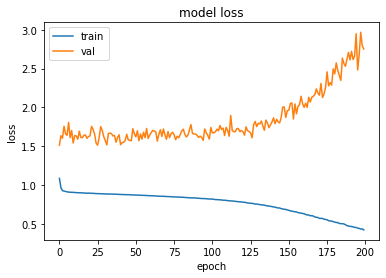

In [9]:
##################
# REPORTS
##################
import ReportsK as reports
reports.plotHistory( hist )

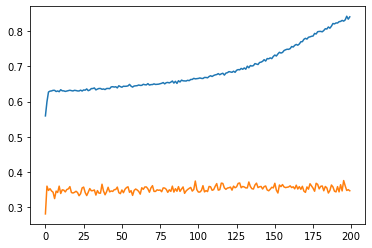

In [10]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [12]:
model.save(os.path.abspath(os.path.join('../../../saves/', "classification-vgg16-1")), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\classification-vgg16-1\assets
